In [82]:
# GMM with K means

def GMM_kmeans(data,K,itr,eps,center):
  def initialization(data,K):

    # write your code here
    #print(center)
    cov=[np.identity(data.shape[1]) for i in range(K)]
    cov=np.array(cov)
    #print(cov)
    w=np.random.uniform(0,1,K)
    summ=sum(w)
    w=[a/summ for a in w]
    w=np.array(w)
    #print(w)
    theta=(center,cov,w)
    return theta

  # Expectation stage

  #%% E-Step GMM
  from scipy.stats import multivariate_normal
  def E_Step_GMM(data,K,theta):

      # write your code here
      P=[]
      center,cov,w=theta
      for center,cov,w in zip(center,cov,w):
        p=w*multivariate_normal.pdf(data, mean=center, cov=cov,allow_singular=True).reshape(len(data),1)
        if len(P)==0:
          P=p
        else:
          P=np.concatenate((P,p),axis=1)
      summ=np.sum(P,axis=1,keepdims=True)
      # print(summ)
      # print(P)
      responsibility=P/summ
      # print(responsibility)
      return responsibility

  # Maximization stage

  #%% M-STEP GMM
  def M_Step_GMM(data,responsibility):
      # write your code here
      Nk=np.sum(responsibility,axis=0)
      # print(Nk)
      w=np.array([n/len(data) for n in Nk])
      # print(w)
      m=[]
      for i in range(data.shape[1]):
        m.append(np.sum(responsibility*data[:,i].reshape(len(data),1),axis=0,keepdims=True)/np.reshape(Nk,(1,len(Nk))))
      center=np.concatenate(m,axis=0).T
      # print(center)

      cov=[]
      for i,c in enumerate(center):
        cov.append(((responsibility[:,i].reshape(len(data),1)*(data-c)).T @(data-c))/Nk[i])
      cov=np.array(cov)
      # print(cov)

      theta=(center,cov,w)

      P=[]
      for center,cov,w in zip(center,cov,w):
        p=w*multivariate_normal.pdf(data, mean=center, cov=cov,allow_singular=True).reshape(len(data),1)
        if len(P)==0:
          P=p
        else:
          P=np.concatenate((P,p),axis=1)
      log_likelihood=np.sum(np.log(np.sum(P,axis=1)))
      # print(log_likelihood)
      # print(theta)
      return theta, log_likelihood

  log_l=[]
  theta=initialization(data,K)

  for n in range(itr):

    responsibility=E_Step_GMM(data,K,theta)

    cluster_label=np.argmax(responsibility,axis=1) #Label Points

    theta,log_likhd=M_Step_GMM(data,responsibility)

    log_l.append(log_likhd)
    if n>2:
      if abs(log_l[n]-log_l[n-1])<eps:
        break

    print(n,end = '-->')
    
  return responsibility, theta ,log_l


In [83]:
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  # write your code here
  def random_points(data,K):
    return np.random.choice(len(data),K)
  init=random_points(data,K)
  center=[]
  for i in init:
    center.append(data[i])
  center=np.array(center)
  #print(center)

  def calc_group(x,center):
    err=0
    group=[[] for _ in range(len(center))]
    for xi in x:
      dist=[]
      for c in center:
        dist.append(np.linalg.norm(xi-c))
      index=dist.index(min(dist))
      err+=min(dist)
      group[index].append(xi)
    return group,err/len(x)

  def label(x,center):
    label=[]
    for a in x:
      dist=[]
      for c in center:
        dist.append(np.linalg.norm(a-c))
      label.append(dist.index(min(dist)))
    return np.array(label)

  def calc_center(group):
    center=[]
    for g in group:
      center.append(np.mean(np.array(g),axis=0))
    return np.array(center)
  err=[]
  for n in range(itr):
    # assignment stage
    # write your code here
    group,error=calc_group(data,center)
    err.append(error)
    # re-estimation stage
    # write your code here
    center=calc_center(group) 
    #print(Cents)
    if n>2:
        if abs(err[n]-err[n-1])<eps:
          break

    print(n,end = '-->')
   
  return group, center,err,label(data,center)


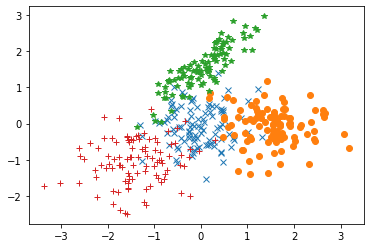

In [84]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
# write your code here
mean=np.array([0,0])
cov=0.3*np.array([[1,0],[0,1]])
x4=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x4[:,0],x4[:,1],"x")

mean=np.array([1.5,0])
cov=0.3*np.array([[1,0],[0,1]])
x2=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x2[:,0],x2[:,1],"o")

mean=np.array([0,1.5])
cov=np.array([[0.3,0.25],[0.25,0.3]])
x3=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x3[:,0],x3[:,1],"*")

mean=np.array([-1.5,-1])
cov=0.4*np.array([[1,0],[0,1]])
x1=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x1[:,0],x1[:,1],"+")

plt.show()

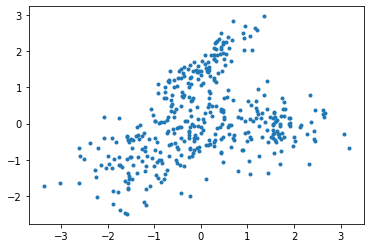

In [85]:
x=np.concatenate((x1,x2,x3,x4), axis=0)
plt.plot(x[:,0],x[:,1],".")

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->17

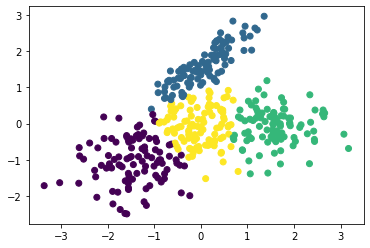

In [91]:
# Performing K_means_clustering
_,center,_,label=K_means_clustering(x,4,20,10**(-20))
# Performing GMM
U,cents,error=GMM_kmeans(x,4,200,0,center)
print(U.shape)
cluster_label=np.argmax(U,axis=1) #Label Points
plt.scatter(x[:,0], x[:,1],c=cluster_label)
plt.show()